# Plotting Lab

In the `datasets/` folder in this notebook you will find two datasets:

- `salary.csv` -- a dataset comparing salary data across gender and tenure lines for academics 
- `wine_quality.csv` -- a dataset comparing chemical qualities of red and white wine and user-rated quality scores (on a 10 point scale)

Your task is to use Matplotlib and Seaborn to create two, high-quality plots, one from each of these two datasets. Your deliverable for this lab is to share your plots in your market's slack channel at the end of the day. 

Part of effective data science work is to be able to take new datasets and investigate them for interesting correlations or relationships that might be the basis of future research or investigation. Take this lab as an opportunity to practice those skills and how plotting can help you in that goal!

##### Useful Workflow Tips

1. Open the data and do a quick EDA:
  - How many rows and columns?
  - Is there missing data?
  - What do each of the columns mean?
    - Sometimes it may not be clear at first glance so double check
    - Googling for some insight into that domain (such as salary information for the academic world) is not just highly encouraged, but may be 100% required in some cases
    - Consider checking in with your colleagues, classmates, and teachers
  - At first glance, are there columns that you think might have an interesting relationship
2. Begin plotting:
  - If a variable of interest is encoded as a string, do some feature extraction / transformation to turn it into numeric values
  - Use something like seaborn's pairplot to visualize overall relationships
  - Start digging into a bivariate relationship
3. Refine plots:
  - Try different plotting types / plotting options to create an accurate and interesting plot
  - Remember to include titles, axes labels, etc.
  - Does your plot have a story? What should a reader take away from your plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Salary

In [2]:
salary = pd.read_csv('datasets/salary.csv')
salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [3]:
salary['rk']

0          full
1          full
2          full
3          full
4          full
5          full
6          full
7          full
8          full
9          full
10         full
11    associate
12         full
13    associate
14         full
15         full
16         full
17    associate
18    associate
19         full
20    assistant
21    associate
22         full
23         full
24    associate
25         full
26    associate
27         full
28    associate
29    associate
30    assistant
31    associate
32    assistant
33    associate
34    associate
35    associate
36    assistant
37    assistant
38    assistant
39    assistant
40    assistant
41    assistant
42    associate
43    assistant
44    assistant
45    assistant
46    assistant
47    assistant
48    assistant
49    assistant
50    assistant
51    assistant
Name: rk, dtype: object

In [4]:
salary

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696
5,male,full,16,doctorate,21,28516
6,female,full,0,masters,32,24900
7,male,full,16,doctorate,18,31909
8,male,full,13,masters,30,31850
9,male,full,13,masters,31,32850


In [5]:
salary.isnull().sum()

sx    0
rk    0
yr    0
dg    0
yd    0
sl    0
dtype: int64

In [6]:
salary.dtypes

sx    object
rk    object
yr     int64
dg    object
yd     int64
sl     int64
dtype: object

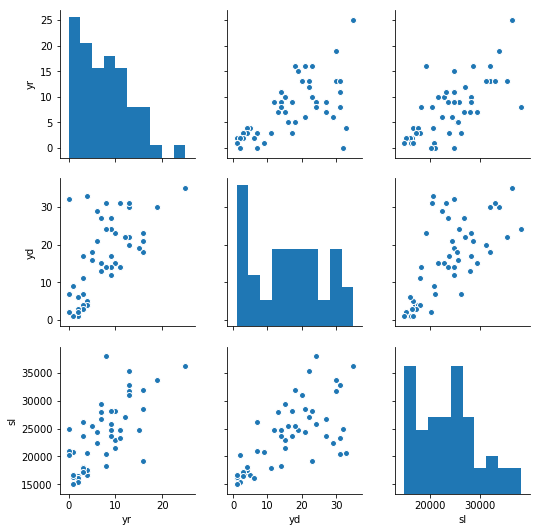

In [7]:
sns.pairplot(salary[['yr', 'yd', 'sl']])

(array([ 10.,   5.,   6.,   6.,  10.,   6.,   2.,   3.,   2.,   2.]),
 array([ 15000. ,  17304.5,  19609. ,  21913.5,  24218. ,  26522.5,
         28827. ,  31131.5,  33436. ,  35740.5,  38045. ]),
 <a list of 10 Patch objects>)

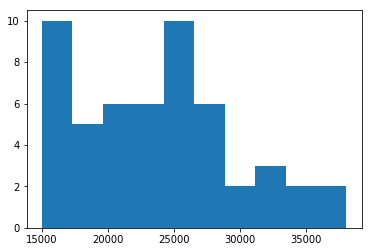

In [8]:
plt.hist(salary['sl'])

In [9]:
def gen_encoder(x):
    for x in salary.values:
        if x[0] == 'male':
            return float(x[5])
        elif x[0] == 'female':
            return float(x[5])
        
        
salary['male_salary'] = salary['sx'].apply(gen_encoder)
salary['female_salary'] = salary['sx'].apply(gen_encoder)
salary.head()

,sx,rk,yr,dg,yd,sl,male_salary,female_salary
0,male,full,25,doctorate,35,36350,36350.0,36350.0
1,male,full,13,doctorate,22,35350,36350.0,36350.0
2,male,full,10,doctorate,23,28200,36350.0,36350.0
3,female,full,7,doctorate,27,26775,36350.0,36350.0
4,male,full,19,masters,30,33696,36350.0,36350.0


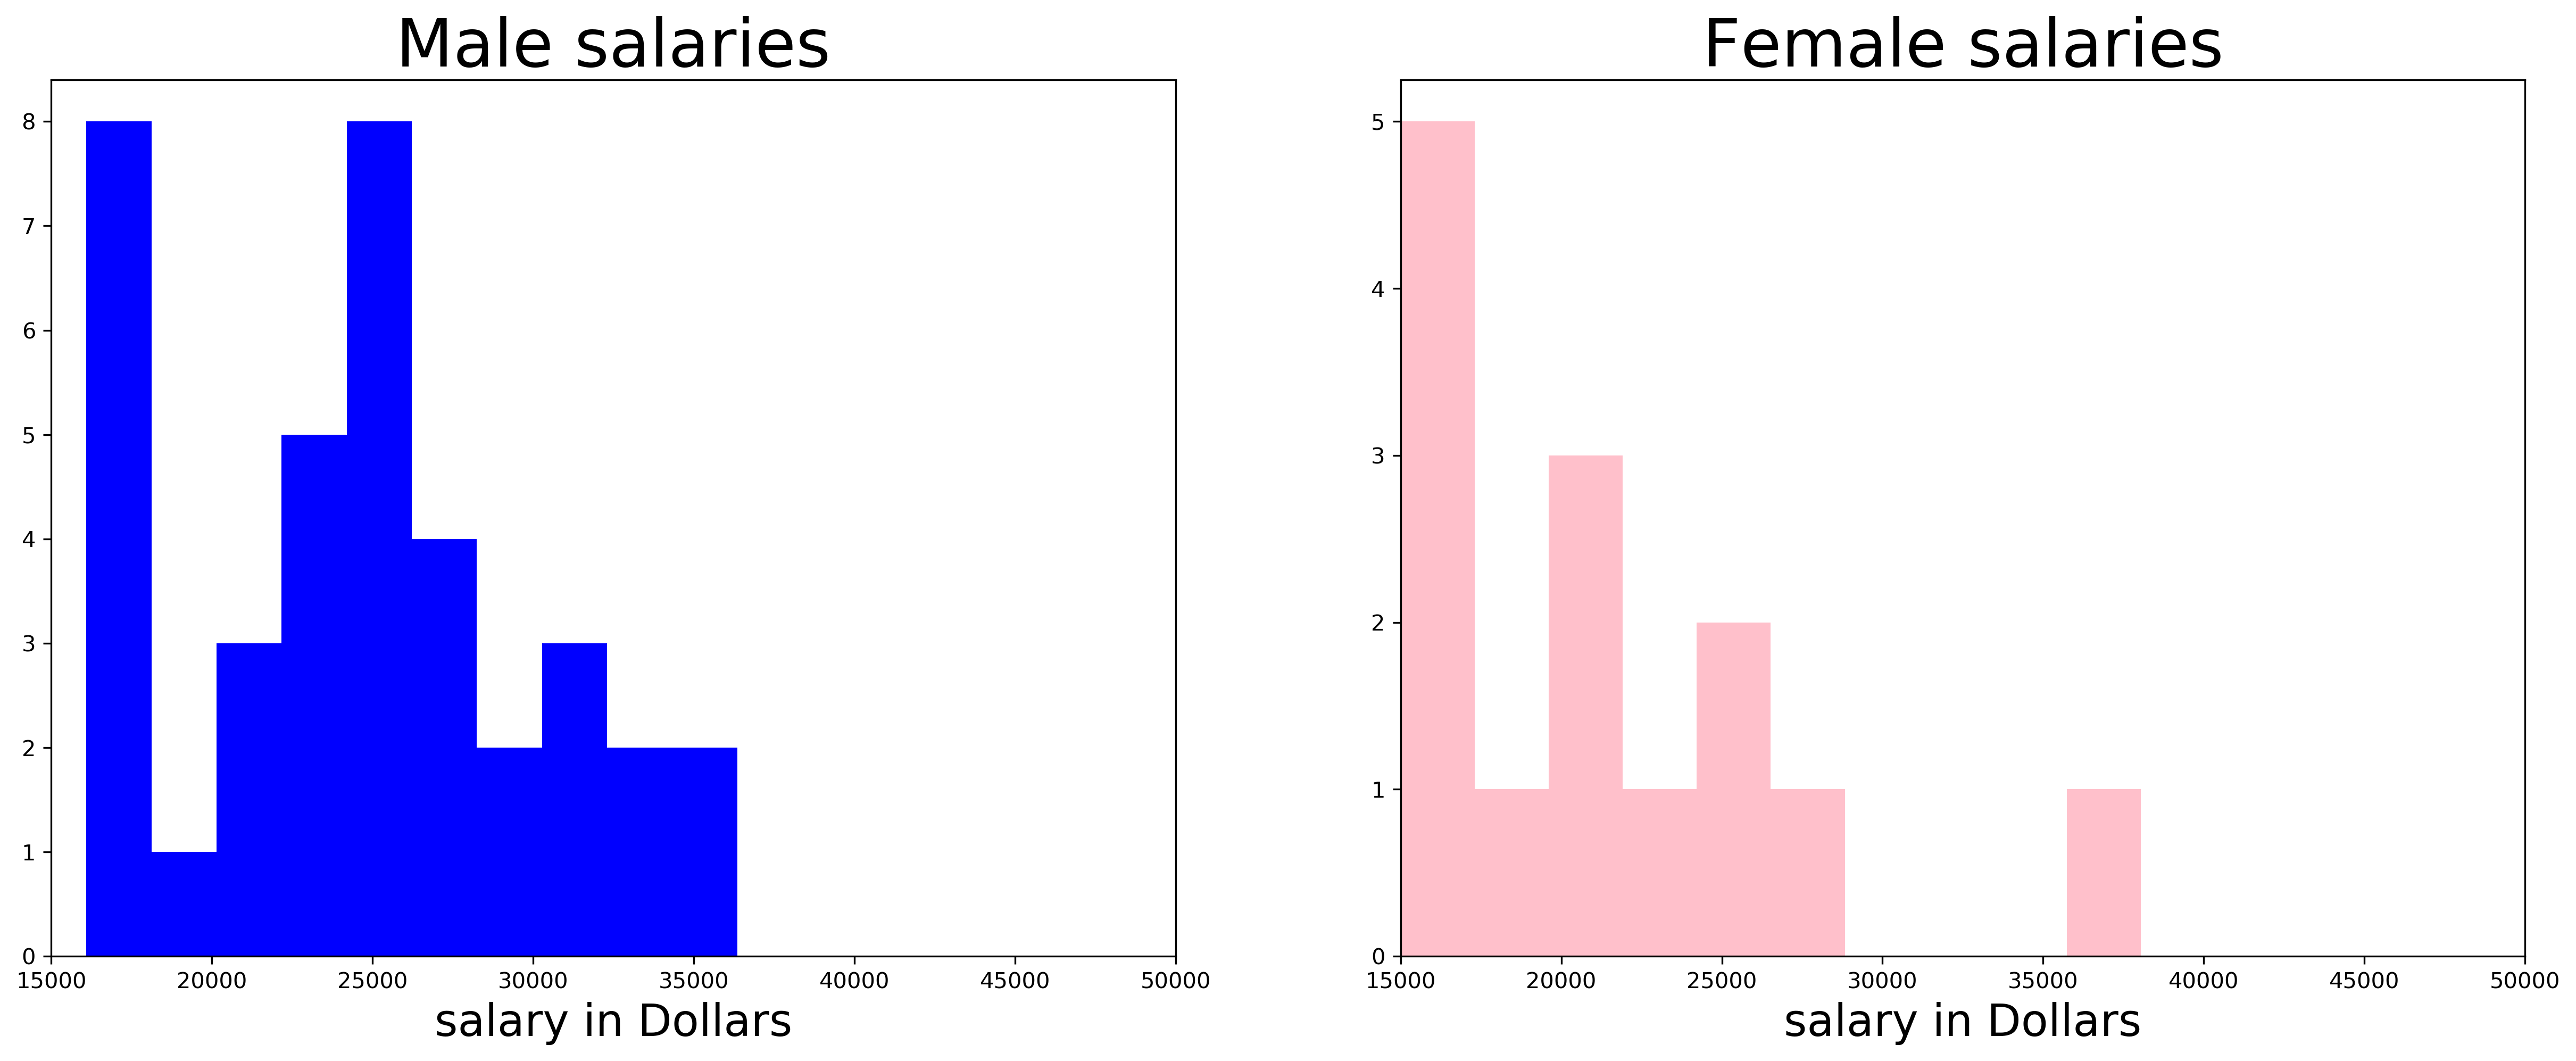

In [36]:
sal_male = [float(x[5]) for x in salary.values if x[0] == 'male']
sal_female = [float(x[5]) for x in salary.values if x[0] == 'female']

fig = plt.figure(figsize=(20,16), dpi=300)
ax1 = fig.add_subplot(221)
ax1.hist(sal_male, color='blue')
ax2 = fig.add_subplot(2,2,2)
ax2.hist(sal_female, color='pink')
ax1.set_title('Male salaries', fontsize=30)
ax2.set_title('Female salaries', fontsize=30)
ax1.set_xlim(15000, 50000)
ax1.set_xlabel('salary in Dollars', fontsize=20)
ax2.set_xlim(15000, 50000)
ax2.set_xlabel('salary in Dollars', fontsize=20)

In [37]:
sal_male

[36350.0,
 35350.0,
 28200.0,
 33696.0,
 28516.0,
 31909.0,
 31850.0,
 32850.0,
 27025.0,
 24750.0,
 28200.0,
 23712.0,
 25748.0,
 29342.0,
 31114.0,
 24742.0,
 22906.0,
 24450.0,
 19175.0,
 20525.0,
 27959.0,
 24832.0,
 25400.0,
 24800.0,
 26182.0,
 23725.0,
 23300.0,
 23713.0,
 20850.0,
 17095.0,
 16700.0,
 17600.0,
 18075.0,
 18000.0,
 20999.0,
 16500.0,
 16094.0,
 16244.0]

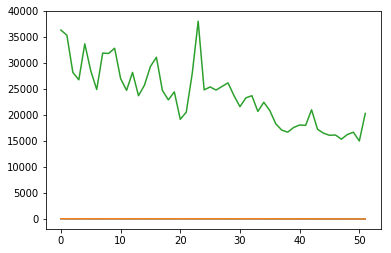

In [10]:
numsalary = salary.loc[:, ['yr', 'yd', 'sl']]
plt.plot(numsalary)

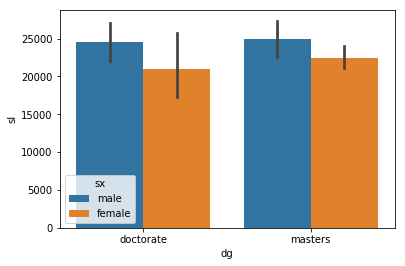

In [25]:
sns.barplot(x='dg', y='sl', hue='sx', data=salary)

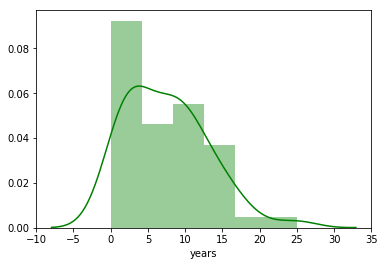

In [30]:
sns.distplot(salary['yr'], color='green', axlabel='years')

In [32]:
#DEGREE
dg_data = salary.loc[:,'dg']
degree = [6 if row == 'masters' else 7 for row in dg_data]
degree

[7,
 7,
 7,
 7,
 6,
 7,
 6,
 7,
 6,
 6,
 7,
 7,
 7,
 6,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7]

# Wine Quality

In [11]:
wine = pd.read_csv('datasets/wine_quality.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [44]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [45]:
c_acid = wine['citric acid']
q = wine['quality']

In [57]:
wine['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

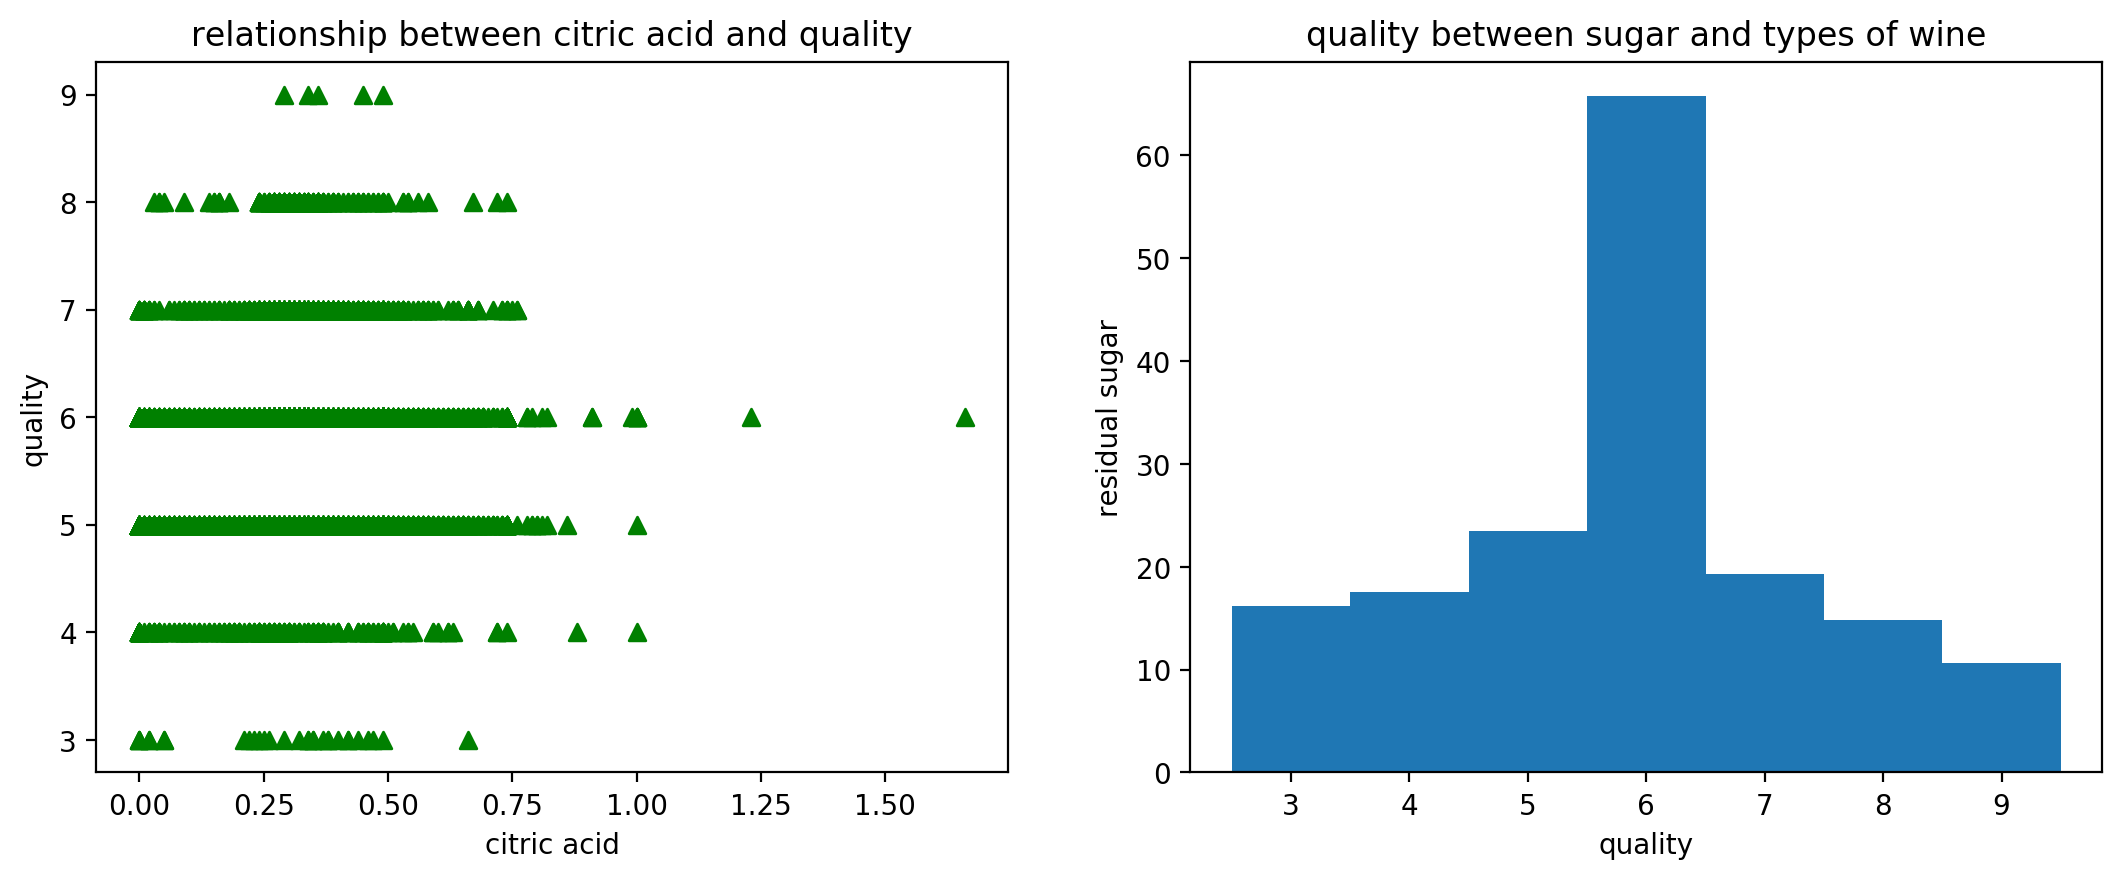

In [59]:
fig = plt.figure(figsize=(20,16), dpi=200)

ax1 = fig.add_subplot(3,3,1)
ax1.set_title('relationship between citric acid and quality')
ax1.set_xlabel('citric acid')
ax1.set_ylabel('quality')
ax1.scatter(c_acid, q, color='green', marker='^')

ax2 = fig.add_subplot(3,3,2)
ax2.set_title('quality between sugar and types of wine')
ax2.set_xlabel('quality')
ax2.set_ylabel('residual sugar')
ax2.bar(wine['quality'], wine['residual sugar'], width=1.0)
plt.show()

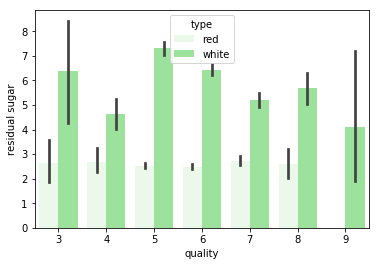

In [61]:
sns.barplot(x='quality', y='residual sugar', hue='type', data=wine, color='lightgreen')

In [62]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [67]:
wine_corr = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']].corr()

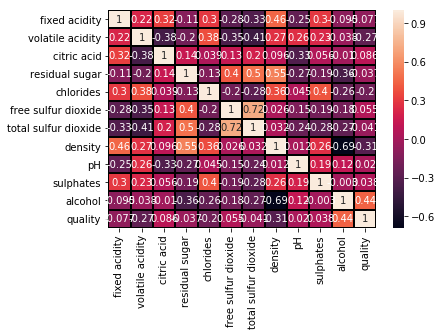

In [73]:
sns.heatmap(wine_corr, annot=True, linecolor='black', linewidth='1.0')